# Loan dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.shape

(9578, 14)

In [7]:
df.size

134092

In [8]:
df.ndim

2

In [9]:
df["credit.policy"].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

# EDA

C:\Users\Jayashree\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Jayashree\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Jayashree\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Jayashree\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


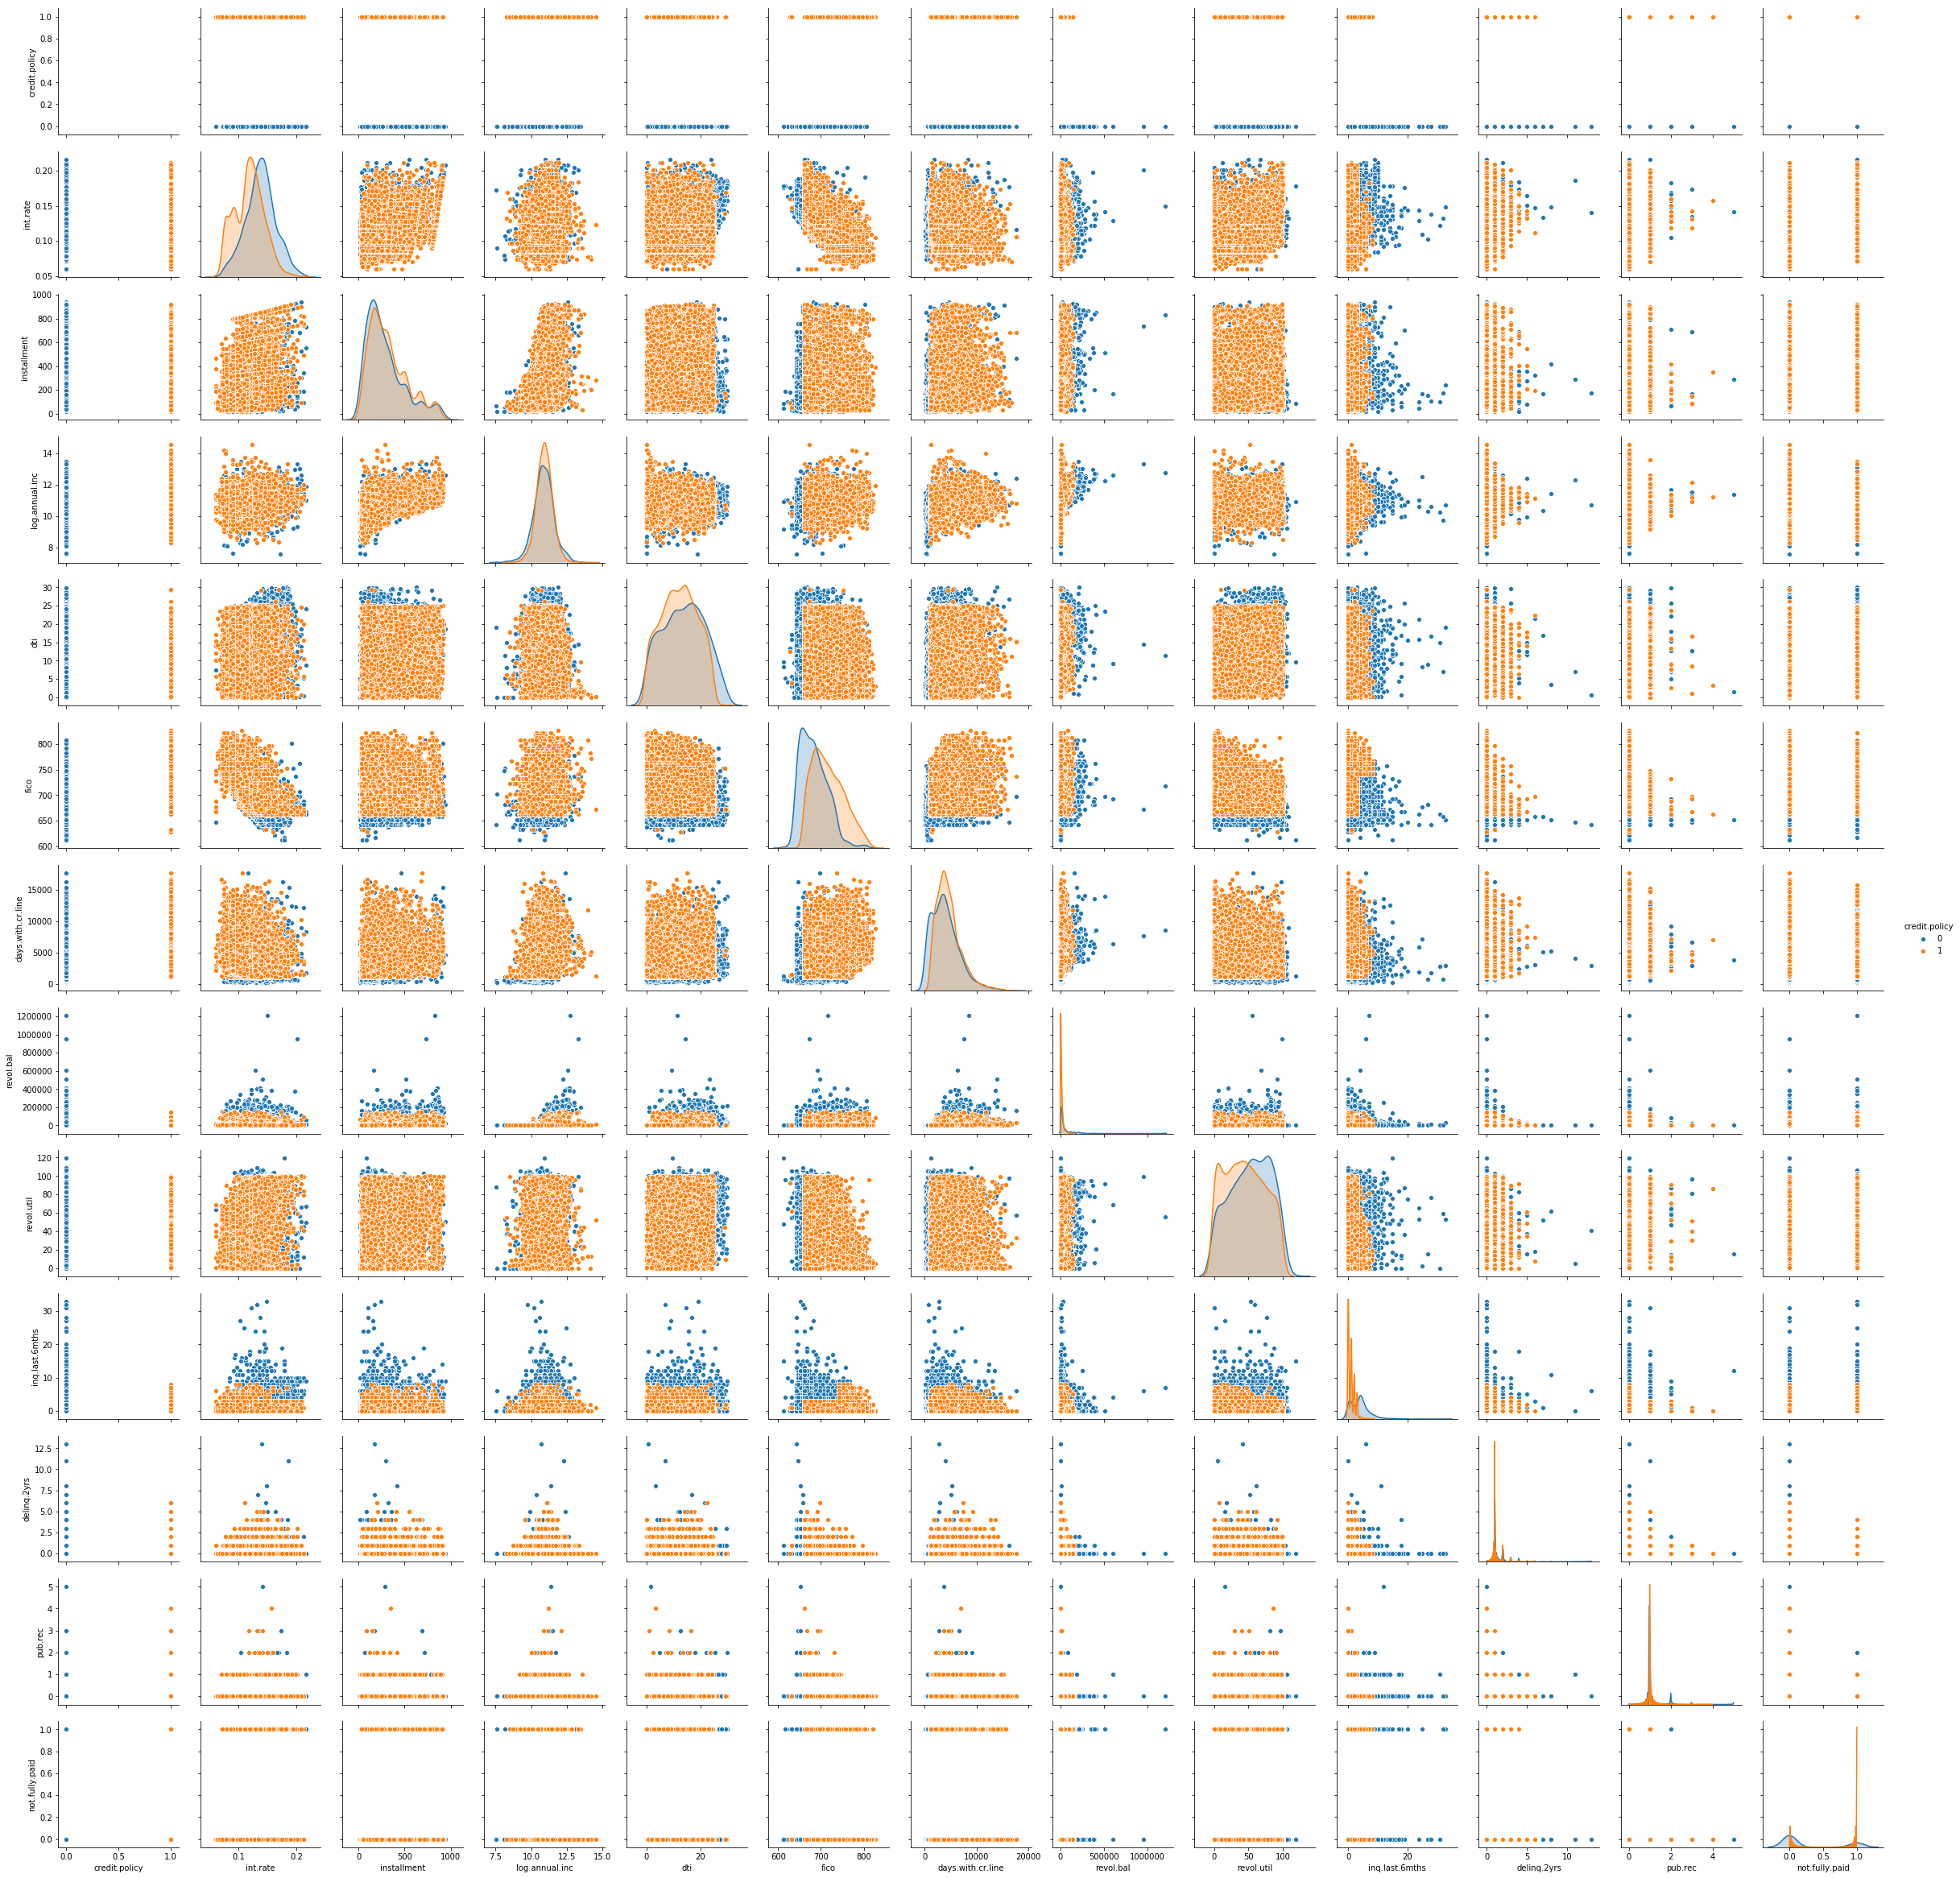

In [10]:
sns.pairplot(df,hue="credit.policy")

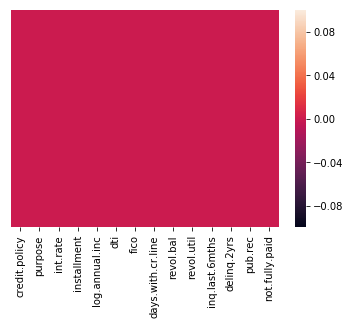

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

# train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=df.drop(["credit.policy","purpose"],axis=1)
x.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [14]:
y=df["credit.policy"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: credit.policy, dtype: int64

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [16]:
x_train.shape

(6704, 12)

In [17]:
x_test.shape

(2874, 12)

# Decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtree=DecisionTreeClassifier(criterion="gini",max_depth=None,min_samples_leaf=1,random_state=10)

In [20]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

# prediction

In [21]:
pred=dtree.predict(x_test)

In [22]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [23]:
accuracy=accuracy_score(y_test,pred)
accuracy

0.9902574808629089

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       530
           1       1.00      0.99      0.99      2344

   micro avg       0.99      0.99      0.99      2874
   macro avg       0.98      0.99      0.98      2874
weighted avg       0.99      0.99      0.99      2874



In [25]:
print(confusion_matrix(y_test,pred))

[[ 519   11]
 [  17 2327]]


# visualisation

In [26]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [27]:
features=list(df.columns[2:])
features

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

In [28]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

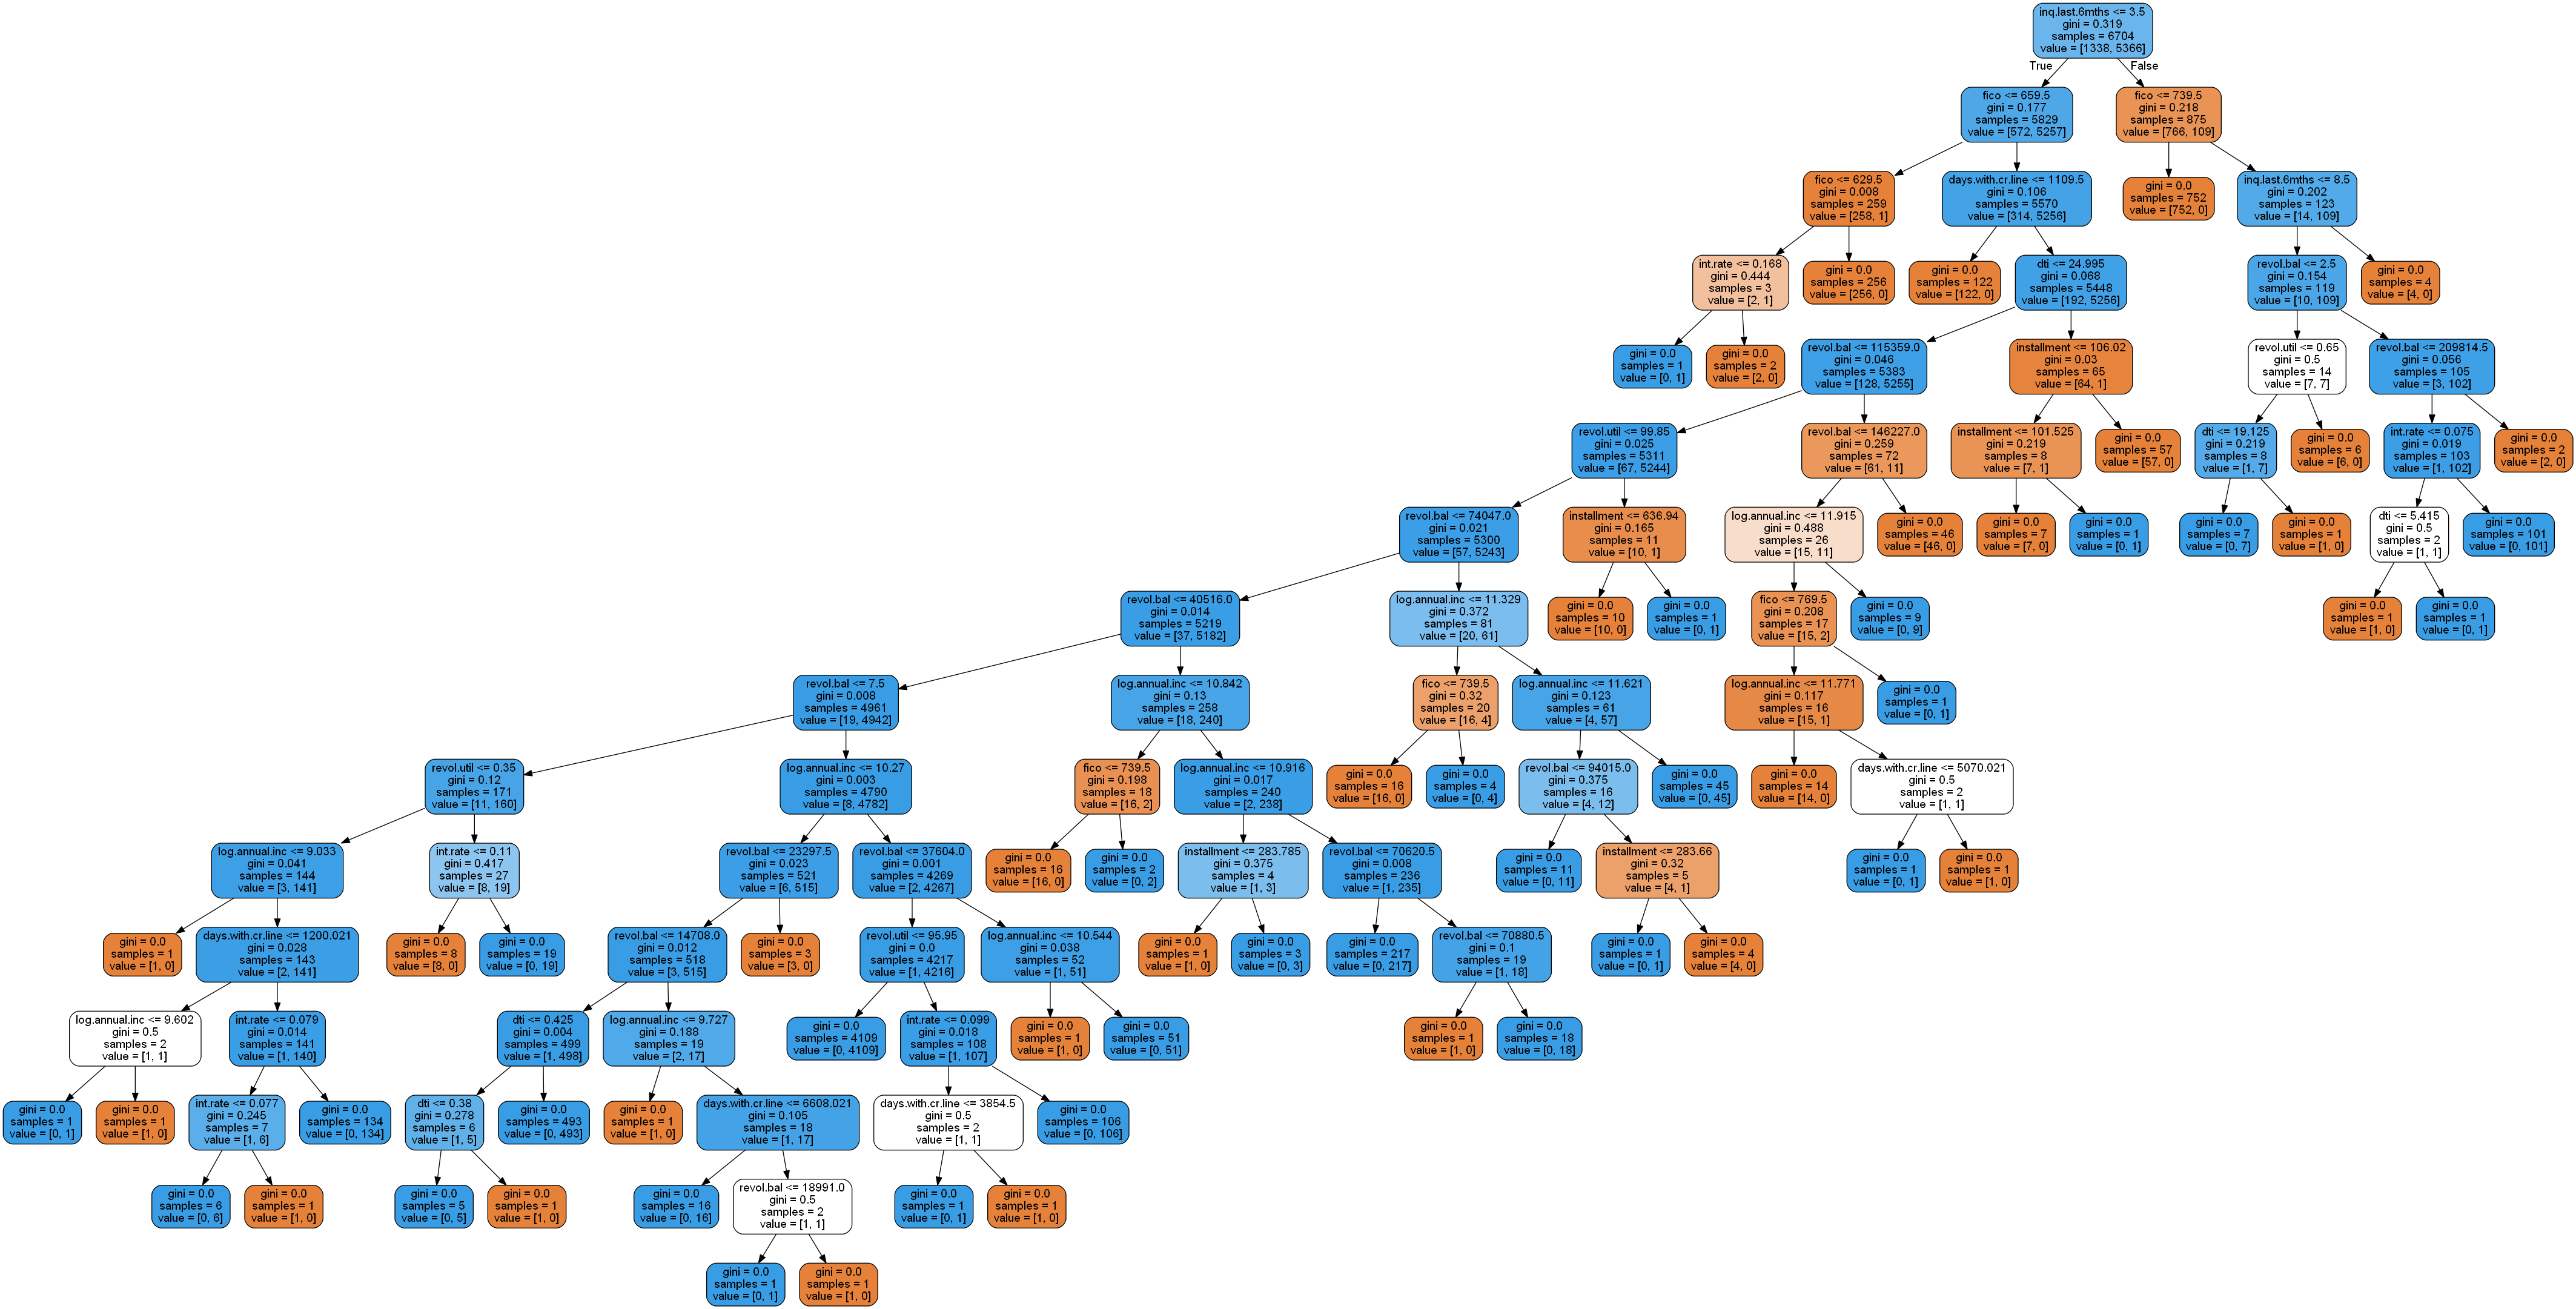

In [29]:
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion="gini",max_depth=None,min_samples_leaf=1,random_state=10)
rfc.fit(x_train,y_train)

C:\Users\Jayashree\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [38]:
predictions = rfc.predict(x_test)

In [39]:
accuracy1=accuracy_score(y_test,predictions)
accuracy1

0.988517745302714

In [40]:
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       530
           1       0.99      0.99      0.99      2344

   micro avg       0.99      0.99      0.99      2874
   macro avg       0.98      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874



In [41]:
print (confusion_matrix(y_test,predictions))

[[ 510   20]
 [  13 2331]]
